In [1]:
# This notebook contains the benchmark model 
# For the pedestrian detection 

In [1]:
import cv2
import imutils
from imutils import paths
from imutils.object_detection import non_max_suppression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

(384, 468, 3)


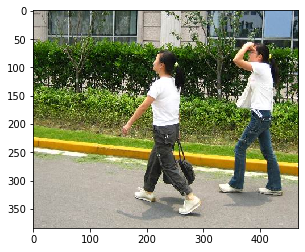

In [3]:
# get an image to test
from DataClass import PennFudanDataset
root = './data/PennFudanPed'
data = PennFudanDataset(root, transforms=None)

# display the selected image
img_number = 11
imagePath = data[img_number]['img_path']

# load the image and resize it to (1) reduce detection time
# and (2) improve detection accuracy
image = cv2.imread(imagePath)
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# resize since the detector works better on low resolution imagas (and inference is faster)
#image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()
print(image.shape)
plt.imshow(image)


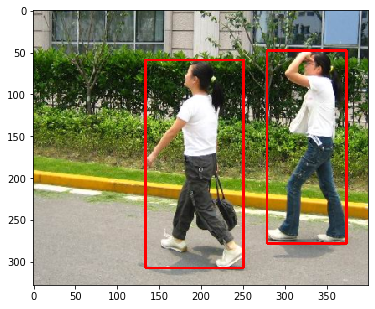

In [4]:
from helpers import display_bounding_box
display_bounding_box(image,data[img_number]['target']['boxes'].numpy(),resize=(400,0))

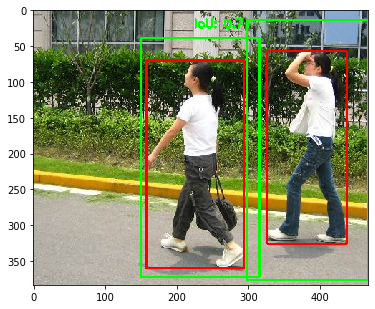

In [5]:
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)
    
# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
bBoxesSVM = non_max_suppression(rects, probs=None, overlapThresh=0.65)

from helpers import eval_pred
iou = eval_pred(image=image,truthBoxes=data[img_number]['target']['boxes'].numpy(),predBoxes=bBoxesSVM)

In [6]:
iou

[(0.7147441643658791, array([150,  39, 316, 372])),
 (0.4873489121676068, array([299,  13, 468, 377]))]

In [7]:
import detection
import model

Detected pedestrian at index 4.
Detected pedestrian at index 7.
Detected pedestrian at index 11.
Detected pedestrian at index 12.
Detected pedestrian at index 14.
Detected pedestrian at index 15.
Detected pedestrian at index 19.
Detected pedestrian at index 20.
Detected pedestrian at index 23.


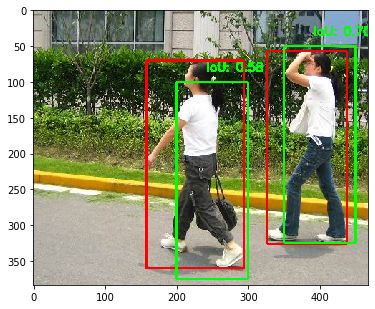

In [8]:
# get PIL-version of the image
image = data[img_number]['img']

# get model and make predictions
detectionModel = model.getModel()
bBoxesNN = detection.detect_pedestrian(image, detectionModel)
iou = eval_pred(image=image,truthBoxes=data[img_number]['target']['boxes'].numpy(),predBoxes=bBoxesNN)

In [9]:
iou

[(0.5773260687342833, array([200, 100, 300, 375])),
 (0.7005413313825896, array([350,  50, 450, 325]))]